In [1]:
# # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_key import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code


In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data=[]


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    city_url = query_url + city
    print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
       # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})     
     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
print(city_data)

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=hermanus
Processing Record 1 of Set 1 | hermanus
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=leh
Processing Record 2 of Set 1 | leh
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=itarema
Processing Record 3 of Set 1 | itarema
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=cidreira
Processing Record 4 of Set 1 | cidreira
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=busselton
Processing Record 5 of Set 1 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=albany
Processing Record 6 of Set 1 | albany
http://api.openweathermap.org/data/2.5/weather?appid=f

http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=aklavik
Processing Record 5 of Set 2 | aklavik
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=lavrentiya
Processing Record 6 of Set 2 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=nosy varika
Processing Record 7 of Set 2 | nosy varika
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=jamestown
Processing Record 8 of Set 2 | jamestown
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=emerald
Processing Record 9 of Set 2 | emerald
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=mahebourg
Processing Record 10 of Set 2 | mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&uni

http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=ilulissat
Processing Record 8 of Set 3 | ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=puerto penasco
Processing Record 9 of Set 3 | puerto penasco
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=carnarvon
Processing Record 10 of Set 3 | carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=tiksi
Processing Record 11 of Set 3 | tiksi
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=katsuura
Processing Record 12 of Set 3 | katsuura
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=pliska
Processing Record 13 of Set 3 | pliska
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&unit

City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=barbate
Processing Record 12 of Set 4 | barbate
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=garh maharaja
Processing Record 13 of Set 4 | garh maharaja
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=sentyabrskiy
Processing Record 14 of Set 4 | sentyabrskiy
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=nikolskoye
Processing Record 15 of Set 4 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=brae
Processing Record 16 of Set 4 | brae
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=macau
Processing Record 17 of Set 4 | macau
http://api.openweathermap.org/da

http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=severo-kurilsk
Processing Record 17 of Set 5 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=portland
Processing Record 18 of Set 5 | portland
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=seoul
Processing Record 19 of Set 5 | seoul
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=mentok
Processing Record 20 of Set 5 | mentok
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=mount gambier
Processing Record 21 of Set 5 | mount gambier
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=naze
Processing Record 22 of Set 5 | naze
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43

http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=gladstone
Processing Record 21 of Set 6 | gladstone
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=srivardhan
Processing Record 22 of Set 6 | srivardhan
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=bathsheba
Processing Record 23 of Set 6 | bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=halalo
Processing Record 24 of Set 6 | halalo
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=port hardy
Processing Record 25 of Set 6 | port hardy
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=kirakira
Processing Record 26 of Set 6 | kirakira
http://api.openweathermap.org/data/2.5/weather?appid=f3fac

http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=pilar
Processing Record 25 of Set 7 | pilar
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=tezu
Processing Record 26 of Set 7 | tezu
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=channel-port aux basques
Processing Record 27 of Set 7 | channel-port aux basques
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=kiama
Processing Record 28 of Set 7 | kiama
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=norman wells
Processing Record 29 of Set 7 | norman wells
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=beya
Processing Record 30 of Set 7 | beya
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6d

http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=hobyo
Processing Record 30 of Set 8 | hobyo
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=sohag
Processing Record 31 of Set 8 | sohag
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=chuy
Processing Record 32 of Set 8 | chuy
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=sola
Processing Record 33 of Set 8 | sola
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=surin
Processing Record 34 of Set 8 | surin
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=gilgit
Processing Record 35 of Set 8 | gilgit
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=bulancak
Processing Record 36 o

http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=dutse
Processing Record 35 of Set 9 | dutse
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=muscat
Processing Record 36 of Set 9 | muscat
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=attawapiskat
Processing Record 37 of Set 9 | attawapiskat
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=porto santo
Processing Record 38 of Set 9 | porto santo
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=huarmey
Processing Record 39 of Set 9 | huarmey
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=katobu
Processing Record 40 of Set 9 | katobu
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a25

http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=sindand
Processing Record 39 of Set 10 | sindand
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=kourou
Processing Record 40 of Set 10 | kourou
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=yerbogachen
Processing Record 41 of Set 10 | yerbogachen
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=lolua
Processing Record 42 of Set 10 | lolua
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=maniitsoq
Processing Record 43 of Set 10 | maniitsoq
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=sur
Processing Record 44 of Set 10 | sur
http://api.openweathermap.org/data/2.5/weather

http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=beisfjord
Processing Record 43 of Set 11 | beisfjord
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=gedo
Processing Record 44 of Set 11 | gedo
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=marcona
Processing Record 45 of Set 11 | marcona
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=mormugao
Processing Record 46 of Set 11 | mormugao
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=wencheng
Processing Record 47 of Set 11 | wencheng
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=san juan de uraba
Processing Record 48 of Set 11 | san juan de uraba
http://api.openweathermap.org/data/2.5/weather?app

http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=corralillo
Processing Record 48 of Set 12 | corralillo
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=zalantun
Processing Record 49 of Set 12 | zalantun
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=chagda
Processing Record 0 of Set 13 | chagda
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=areka
Processing Record 1 of Set 13 | areka
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=edd
Processing Record 2 of Set 13 | edd
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=savannah bight
Processing Record 3 of Set 13 | savannah bight
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a25

In [4]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df=pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,18.78,91,95,11.54,ZA,1678033340
1,leh,34.1667,77.5833,-10.20,86,97,0.64,IN,1678033340
2,itarema,-2.9248,-39.9167,29.96,66,67,6.90,BR,1678033340
3,cidreira,-30.1811,-50.2056,24.73,82,47,6.17,BR,1678033340
4,busselton,-33.6500,115.3333,13.92,87,0,4.63,AU,1678033340


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,18.78,91,95,11.54,ZA,1678033340
1,leh,34.1667,77.5833,-10.20,86,97,0.64,IN,1678033340
2,itarema,-2.9248,-39.9167,29.96,66,67,6.90,BR,1678033340
3,cidreira,-30.1811,-50.2056,24.73,82,47,6.17,BR,1678033340
4,busselton,-33.6500,115.3333,13.92,87,0,4.63,AU,1678033340


## Create the Scatter Plots Requested

### Latitude Vs. Temperature

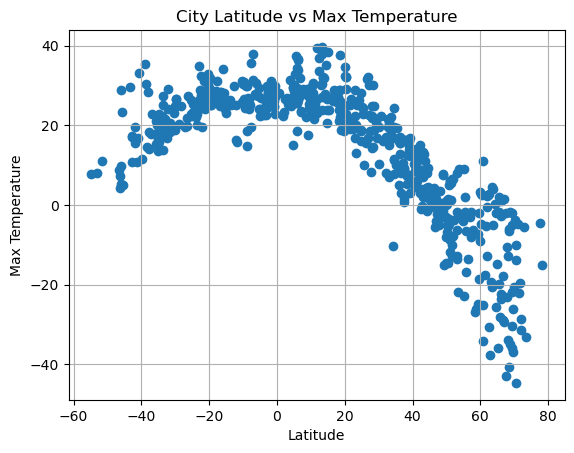

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.title(f"City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

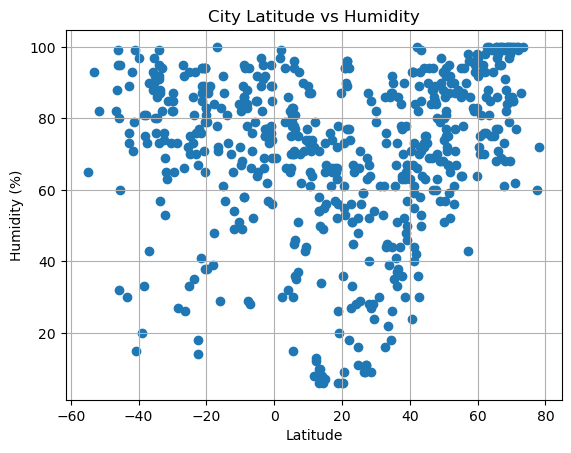

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

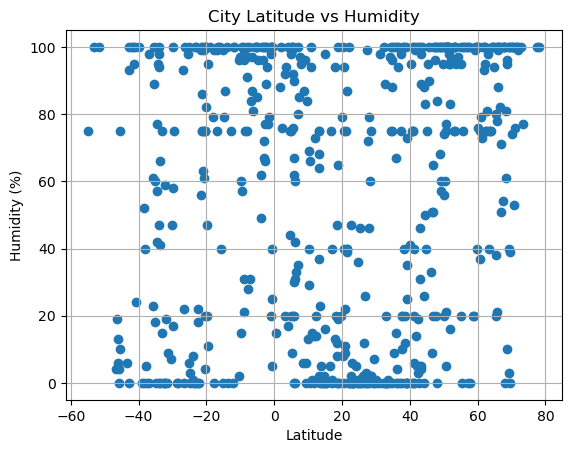

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

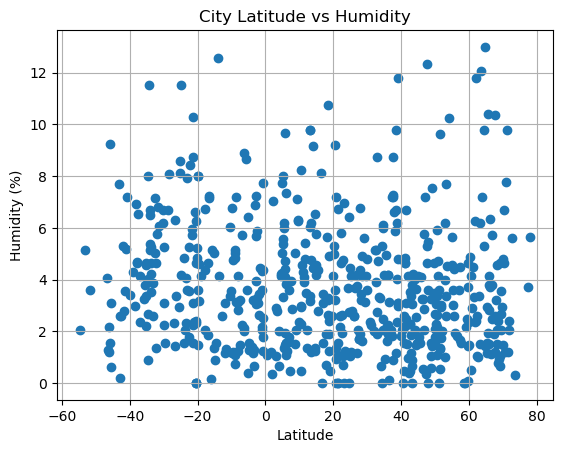

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Generate plots     
    fig1, ax1 = plt.subplots(figsize=(6,4))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"Discussion about the linear relationship: {round(correlation[0],2)}")


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,leh,34.1667,77.5833,-10.20,86,97,0.64,IN,1678033340
5,albany,42.6001,-73.9662,4.05,70,99,0.45,US,1678033340
7,shimoda,34.6667,138.9500,7.84,87,96,5.98,JP,1678033341
8,dali,25.7000,100.1833,10.01,56,0,2.80,CN,1678033341
9,ponta do sol,32.6667,-17.1000,21.51,86,89,3.89,PT,1678033341


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,18.78,91,95,11.54,ZA,1678033340
2,itarema,-2.9248,-39.9167,29.96,66,67,6.90,BR,1678033340
3,cidreira,-30.1811,-50.2056,24.73,82,47,6.17,BR,1678033340
4,busselton,-33.6500,115.3333,13.92,87,0,4.63,AU,1678033340
6,cairns,-16.9167,145.7667,24.97,100,75,4.63,AU,1678033224


###  Temperature vs. Latitude Linear Regression Plot


The r-squared is: 0.7772248507423382
Discussion about the linear relationship: -0.88


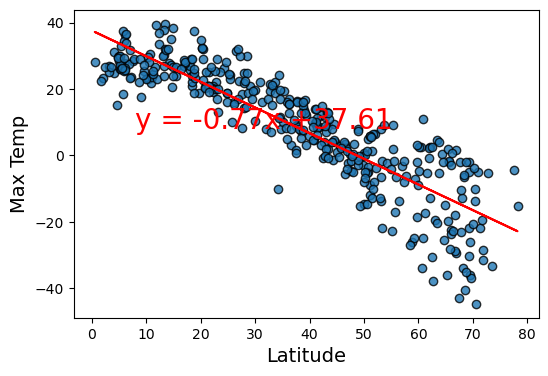

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Northern", (8, 8))

plt.show()

The r-squared is: 0.35353337792599054
Discussion about the linear relationship: 0.59


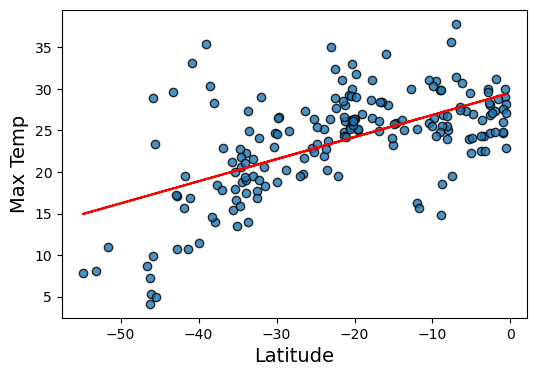

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Southern", (8, 8))

plt.show()

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.1820184424470255
Discussion about the linear relationship: 0.43


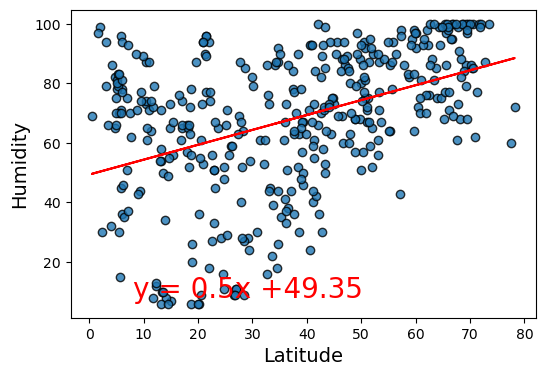

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity", "Northern", (8, 8))

plt.show()

The r-squared is: 0.00048678090217792175
Discussion about the linear relationship: -0.02


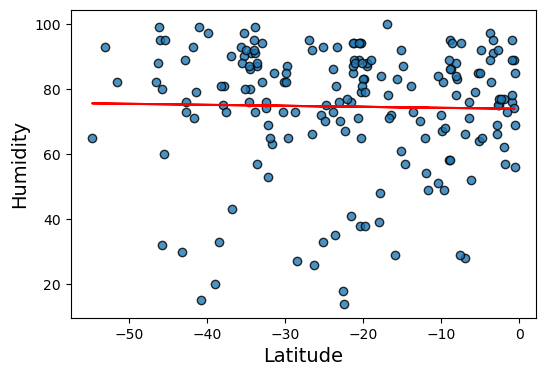

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity", "Southern", (8, 8))

plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.11933246424784216
Discussion about the linear relationship: 0.35


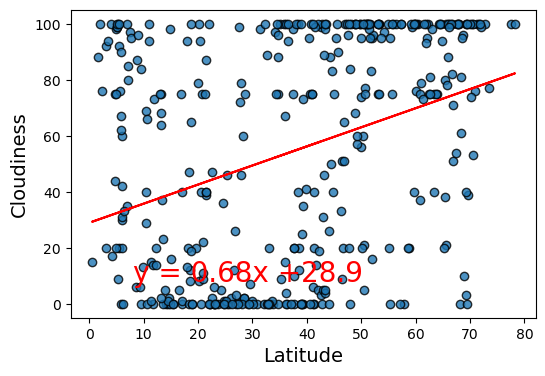

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Northern", (8, 8))

plt.show()

The r-squared is: 0.10242822651165728
Discussion about the linear relationship: 0.32


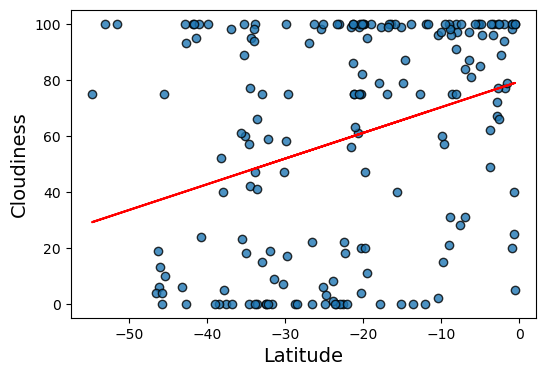

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Southern", (8, 8))

plt.show()

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0005917456852475092
Discussion about the linear relationship: -0.02


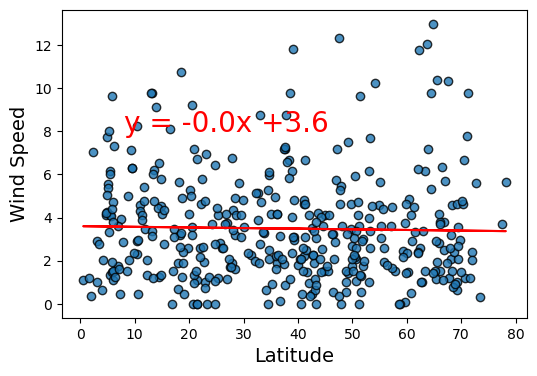

In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Northern", (8, 8))

plt.show()

The r-squared is: 0.009663734720281283
Discussion about the linear relationship: -0.1


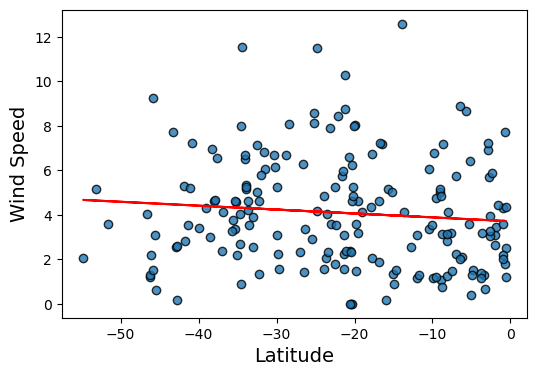

In [22]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Southern", (8, 8))

plt.show()